In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [13]:
df = pd.read_csv("flights.csv")

C:\Users\chauh\AppData\Local\Temp\ipykernel_5372\1505972477.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("flights.csv")


In [14]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [16]:
df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [17]:
df['DELAYED'] = df['ARRIVAL_DELAY'].apply(lambda x: 1 if x > 15 else 0)

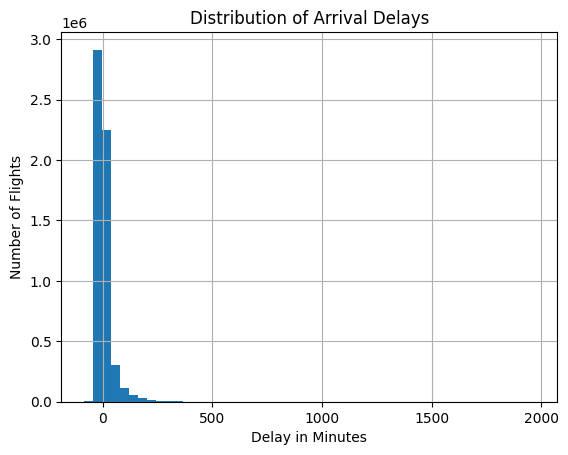

In [24]:
df['ARRIVAL_DELAY'].hist(bins=50)
plt.title("Distribution of Arrival Delays")
plt.xlabel("Delay in Minutes")
plt.ylabel("Number of Flights")
plt.show()

Text(0.5, 1.0, 'Average Delay Rate by Airline')

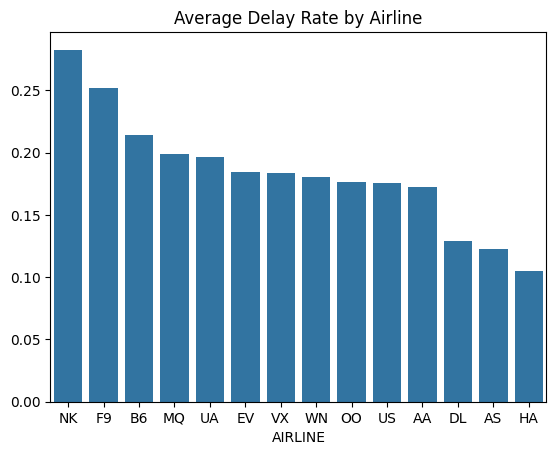

In [20]:
airline_delay = df.groupby('AIRLINE')['DELAYED'].mean().sort_values(ascending=False)
sns.barplot(x=airline_delay.index, y=airline_delay.values)
plt.title("Average Delay Rate by Airline")

In [21]:
def time_of_day(hour):
    if hour < 12:
        return 'Morning'
    elif hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['SCHEDULED_HOUR'] = df['SCHEDULED_DEPARTURE'] // 100
df['TIME_OF_DAY'] = df['SCHEDULED_HOUR'].apply(time_of_day)


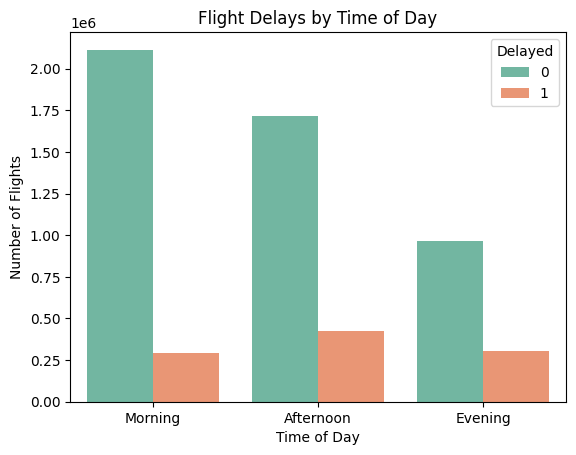

In [28]:
sns.countplot(data=df, x='TIME_OF_DAY', hue='DELAYED', palette='Set2')
plt.title("Flight Delays by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Flights")
plt.legend(title="Delayed")
plt.show()

<Axes: xlabel='ORIGIN_AIRPORT', ylabel='DELAYED'>

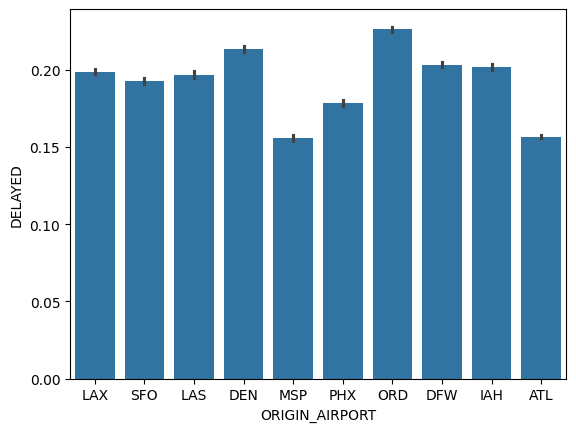

In [30]:
top_airports = df['ORIGIN_AIRPORT'].value_counts().head(10).index
sns.barplot(x='ORIGIN_AIRPORT', y='DELAYED', data=df[df['ORIGIN_AIRPORT'].isin(top_airports)])

In [31]:
origin_delays = df[df['DELAYED']==1]['ORIGIN_AIRPORT'].value_counts().head(10)

C:\Users\chauh\AppData\Local\Temp\ipykernel_5372\1902548756.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=origin_delays.index, y=origin_delays.values, palette='Reds')


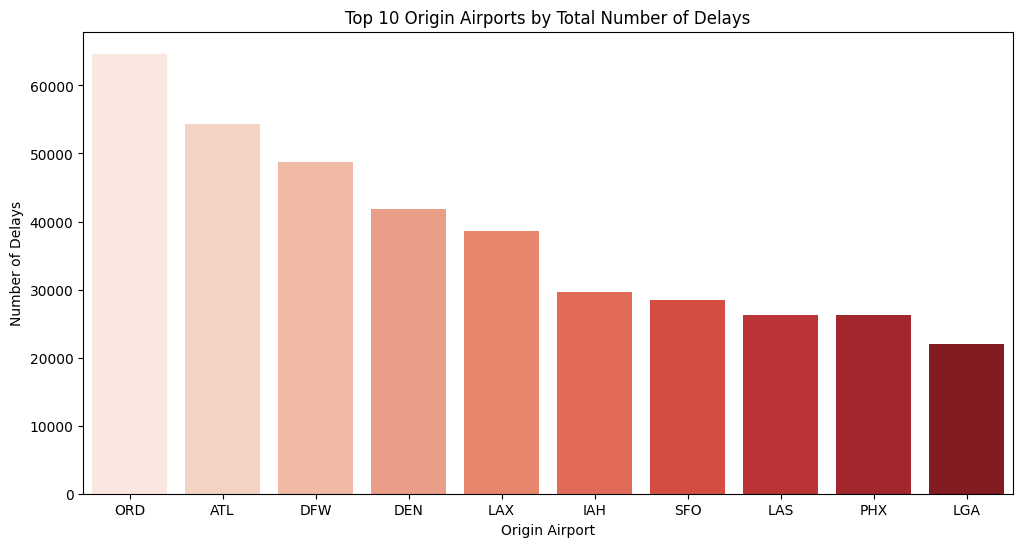

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x=origin_delays.index, y=origin_delays.values, palette='Reds')
plt.title("Top 10 Origin Airports by Total Number of Delays")
plt.xlabel("Origin Airport")
plt.ylabel("Number of Delays")
plt.show()


C:\Users\chauh\AppData\Local\Temp\ipykernel_5372\3866605284.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dest_delays.index, y=dest_delays.values, palette='Blues')


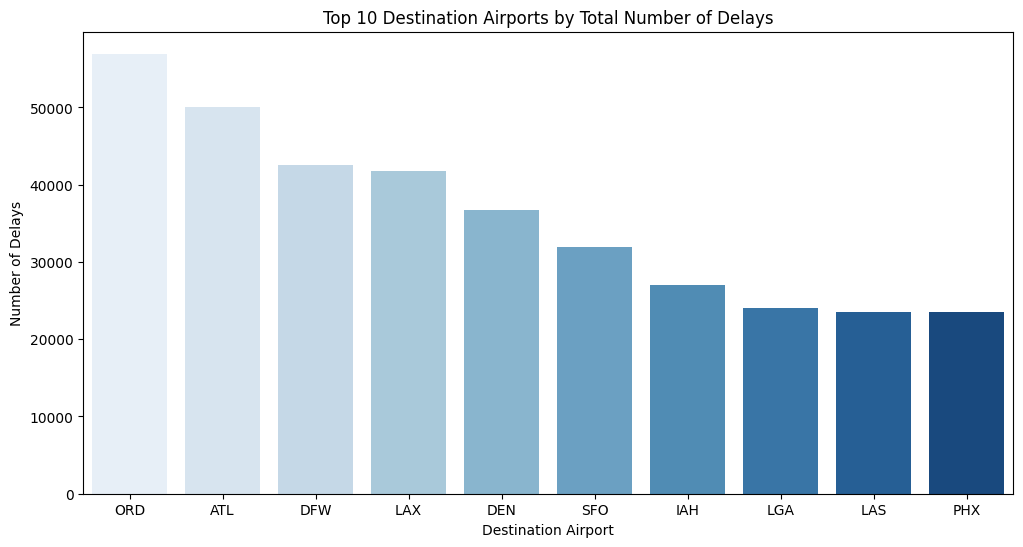

In [42]:
dest_delays = df[df['DELAYED'] == 1]['DESTINATION_AIRPORT'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=dest_delays.index, y=dest_delays.values, palette='Blues')
plt.title("Top 10 Destination Airports by Total Number of Delays")
plt.xlabel("Destination Airport")
plt.ylabel("Number of Delays")
plt.show()


In [43]:
df = df.dropna(subset=['SCHEDULED_DEPARTURE', 'DELAYED', 'AIRLINE', 'ORIGIN_AIRPORT'])


In [75]:
df['SCHEDULED_DEPARTURE'] = pd.to_datetime(df['SCHEDULED_DEPARTURE'])
df['DAY_OF_WEEK'] = df['SCHEDULED_DEPARTURE'].dt.dayofweek
df['MONTH'] = df['SCHEDULED_DEPARTURE'].dt.month


In [76]:
for col in ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'TIME_OF_DAY']:
    df[col] = df[col].astype('category').cat.codes


In [77]:
features = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
            'SCHEDULED_HOUR', 'DAY_OF_WEEK', 'MONTH', 'TIME_OF_DAY']

X = df[features]
y = df['DELAYED']


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
model = LogisticRegression(C=1.0, penalty='l2', solver='liblinear')  # L2 regularization (Ridge)
model.fit(X_train_scaled, y_train)

LogisticRegression(solver='liblinear')

In [84]:
y_pred = model.predict(X_test_scaled)

In [90]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8242


In [88]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1]))

Confusion Matrix:
 [[959170      0]
 [204646      0]]


C:\Users\chauh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chauh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chauh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90    959170
           1       0.00      0.00      0.00    204646

    accuracy                           0.82   1163816
   macro avg       0.41      0.50      0.45   1163816
weighted avg       0.68      0.82      0.74   1163816

ROC AUC Score: 0.609524084051112
